<a href="https://colab.research.google.com/github/aishahismail3/Malaysia-COVID-19-Vaccination-EDA/blob/main/Malaysia_COVID_19_Vaccination_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline         
from datetime import datetime, timedelta,date 
import plotly
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

# 1. Combine / Merge

In [ ]:
pop = pd.read_csv('https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/static/population.csv')
vaxreg_msia = pd.read_csv('https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/registration/vaxreg_malaysia.csv')
vaxreg_state= pd.read_csv('https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/registration/vaxreg_state.csv')
vax_msia = pd.read_csv('https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_malaysia.csv')
vax_state = pd.read_csv('https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_state.csv')

print('population', pop.shape)
print('vaxreg_msia', vaxreg_msia.shape)
print('vaxreg_state', vaxreg_state.shape)
print('vax_msia', vax_msia.shape)
print('vax_state', vax_state.shape)


population (17, 5)
vaxreg_msia (86, 11)
vaxreg_state (1376, 11)
vax_msia (206, 17)
vax_state (3296, 18)


In [ ]:
set(pop.columns).intersection(set(vax_state.columns))

{'state'}

In [ ]:
pop.columns 

Index(['state', 'idxs', 'pop', 'pop_18', 'pop_60'], dtype='object')

In [ ]:
pop_map = pop[['state', 'idxs', 'pop', 'pop_18', 'pop_60']]

combined = vax_state.merge(pop, how='left', left_on='state',right_on='state', 
                  suffixes=('', '_y'))
combined.drop(combined.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
# print((combined.shape))
print('combined', combined.shape)

combined (3296, 22)


In [ ]:
combined.tail(3)

,date,state,daily_partial,daily_full,daily,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,idxs,pop,pop_18,pop_60
3293,2021-09-17,W.P. Kuala Lumpur,1582,17966,19548,2807016,2523627,5330629,283,0,1198,2584,349,4460,0,10848,14,95,14,1773700,1348600,205800
3294,2021-09-17,W.P. Labuan,45,75,120,73837,66984,140821,2461,0,43,70,2,5,0,0,0,0,15,99600,68500,7900
3295,2021-09-17,W.P. Putrajaya,139,685,824,128688,123078,251766,0,0,139,658,0,22,0,0,0,5,16,110000,67700,5000


In [ ]:
# combined with vaxreg
vaxreg_state.columns

Index(['date', 'state', 'total', 'phase2', 'mysj', 'call', 'web', 'children',
       'elderly', 'comorb', 'oku'],
      dtype='object')

In [ ]:
vaxreg_state_map = vaxreg_state[['date', 'state', 'total', 'phase2', 'mysj', 'call', 'web', 'children',
       'elderly', 'comorb', 'oku']]

df_state = combined.merge(vaxreg_state_map, how='left', left_on=['date','state'],
                           right_on=['date','state'], 
                           suffixes=('', '_sta'))
df_state.drop(df_state.filter(regex='_sta$').columns.tolist(),axis=1, inplace=True)
print('df_state', df_state.shape)

df_state (3296, 31)


In [ ]:
df_state.tail(3)

,date,state,daily_partial,daily_full,daily,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,idxs,pop,pop_18,pop_60,total,phase2,mysj,call,web,children,elderly,comorb,oku
3293,2021-09-17,W.P. Kuala Lumpur,1582,17966,19548,2807016,2523627,5330629,283,0,1198,2584,349,4460,0,10848,14,95,14,1773700,1348600,205800,2096390.0,520000.0,2058496.0,1143.0,36751.0,136565.0,257125.0,370418.0,49880.0
3294,2021-09-17,W.P. Labuan,45,75,120,73837,66984,140821,2461,0,43,70,2,5,0,0,0,0,15,99600,68500,7900,70453.0,18440.0,65328.0,17.0,5108.0,6837.0,6679.0,14645.0,1346.0
3295,2021-09-17,W.P. Putrajaya,139,685,824,128688,123078,251766,0,0,139,658,0,22,0,0,0,5,16,110000,67700,5000,101101.0,24060.0,99645.0,37.0,1419.0,12523.0,5184.0,21148.0,1970.0


#2. Clean

In [ ]:
df_state.isnull().sum()

date                      0
state                     0
daily_partial             0
daily_full                0
daily                     0
cumul_partial             0
cumul_full                0
cumul                     0
cumul_partial_child       0
cumul_full_child          0
pfizer1                   0
pfizer2                   0
sinovac1                  0
sinovac2                  0
astra1                    0
astra2                    0
cansino                   0
pending                   0
idxs                      0
pop                       0
pop_18                    0
pop_60                    0
total                  1920
phase2                 1920
mysj                   1920
call                   1920
web                    1920
children               1920
elderly                1920
comorb                 1920
oku                    1920
dtype: int64

In [ ]:
# fill null with 0
df_state['total'] = df_state['total'].fillna(0)
df_state['phase2'] = df_state['phase2'].fillna(0)
df_state['mysj'] = df_state['mysj'].fillna(0)
df_state['call'] = df_state['call'].fillna(0)
df_state['web'] = df_state['web'].fillna(0)
df_state['children'] = df_state['children'].fillna(0)
df_state['elderly'] = df_state['elderly'].fillna(0)
df_state['comorb'] = df_state['comorb'].fillna(0)
df_state['oku'] = df_state['oku'].fillna(0)

In [ ]:
df_state.dtypes

date                    object
state                   object
daily_partial            int64
daily_full               int64
daily                    int64
cumul_partial            int64
cumul_full               int64
cumul                    int64
cumul_partial_child      int64
cumul_full_child         int64
pfizer1                  int64
pfizer2                  int64
sinovac1                 int64
sinovac2                 int64
astra1                   int64
astra2                   int64
cansino                  int64
pending                  int64
idxs                     int64
pop                      int64
pop_18                   int64
pop_60                   int64
total                  float64
phase2                 float64
mysj                   float64
call                   float64
web                    float64
children               float64
elderly                float64
comorb                 float64
oku                    float64
dtype: object

In [ ]:
# change float to int
df_state[['total','phase2', 'mysj', 'call','web', 'children', 'elderly', 'comorb','oku']] = df_state[['total','phase2', 'mysj', 'call', 'web', 'children', 'elderly', 'comorb','oku']].astype('int')

In [ ]:
df_state.dtypes

date                   object
state                  object
daily_partial           int64
daily_full              int64
daily                   int64
cumul_partial           int64
cumul_full              int64
cumul                   int64
cumul_partial_child     int64
cumul_full_child        int64
pfizer1                 int64
pfizer2                 int64
sinovac1                int64
sinovac2                int64
astra1                  int64
astra2                  int64
cansino                 int64
pending                 int64
idxs                    int64
pop                     int64
pop_18                  int64
pop_60                  int64
total                   int64
phase2                  int64
mysj                    int64
call                    int64
web                     int64
children                int64
elderly                 int64
comorb                  int64
oku                     int64
dtype: object

In [ ]:
# Merge for MSIA

In [ ]:
vaxreg_msia.columns

Index(['date', 'state', 'total', 'phase2', 'mysj', 'call', 'web', 'children',
       'elderly', 'comorb', 'oku'],
      dtype='object')

In [ ]:
vaxreg_msia_map = vaxreg_msia[['date', 'total', 'phase2', 'mysj', 'call', 'web', 'children',
       'elderly', 'comorb', 'oku']]

df_msia = vax_msia.merge(vaxreg_msia_map, how='left', left_on=['date'],
                           right_on=['date'], 
                           suffixes=('', '_y'))
df_msia.drop(df_msia.filter(regex='_sta$').columns.tolist(),axis=1, inplace=True)
print((df_msia.shape))


(206, 26)


In [ ]:
df_msia.tail(3)

,date,daily_partial,daily_full,daily,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,total,phase2,mysj,call,web,children,elderly,comorb,oku
203,2021-09-15,68534,180276,248810,21719553,17833355,39483116,69636,0,56538,112355,8686,43050,930,21238,1791,4222,24110163.0,6731586.0,22907119.0,11408.0,1191636.0,2232870.0,3319028.0,4997616.0,574589.0
204,2021-09-16,62108,140190,202298,21783871,17973545,39685414,86954,0,39815,80274,7178,33376,386,23043,2210,16016,24143374.0,6734868.0,22942135.0,11386.0,1189853.0,2248298.0,3320442.0,4998769.0,575564.0
205,2021-09-17,75986,162016,238002,21861904,18135561,39923416,116322,0,68123,101285,6950,34810,606,22376,2047,1805,24178099.0,6738328.0,22978652.0,11378.0,1188069.0,2265656.0,3321953.0,5000253.0,576521.0


In [ ]:
df_msia.isnull().sum()

date                     0
daily_partial            0
daily_full               0
daily                    0
cumul_partial            0
cumul_full               0
cumul                    0
cumul_partial_child      0
cumul_full_child         0
pfizer1                  0
pfizer2                  0
sinovac1                 0
sinovac2                 0
astra1                   0
astra2                   0
cansino                  0
pending                  0
total                  120
phase2                 120
mysj                   120
call                   120
web                    120
children               120
elderly                120
comorb                 120
oku                    120
dtype: int64

In [ ]:
# fill null with 0
df_msia['total'] = df_msia['total'].fillna(0)
df_msia['phase2'] = df_msia['phase2'].fillna(0)
df_msia['mysj'] = df_msia['mysj'].fillna(0)
df_msia['call'] = df_msia['call'].fillna(0)
df_msia['web'] = df_msia['web'].fillna(0)
df_msia['children'] = df_msia['children'].fillna(0)
df_msia['elderly'] = df_msia['elderly'].fillna(0)
df_msia['comorb'] = df_msia['comorb'].fillna(0)
df_msia['oku'] = df_msia['oku'].fillna(0)

In [ ]:
df_msia.dtypes

date                    object
daily_partial            int64
daily_full               int64
daily                    int64
cumul_partial            int64
cumul_full               int64
cumul                    int64
cumul_partial_child      int64
cumul_full_child         int64
pfizer1                  int64
pfizer2                  int64
sinovac1                 int64
sinovac2                 int64
astra1                   int64
astra2                   int64
cansino                  int64
pending                  int64
total                  float64
phase2                 float64
mysj                   float64
call                   float64
web                    float64
children               float64
elderly                float64
comorb                 float64
oku                    float64
dtype: object

In [ ]:
# change float to int
df_msia[['total','phase2', 'mysj', 'call','web', 'children', 'elderly', 'comorb','oku']] = df_msia[['total','phase2', 'mysj', 'call', 'web', 'children', 'elderly', 'comorb','oku']].astype('int')

In [ ]:
df_msia.tail(2)

,date,daily_partial,daily_full,daily,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,total,phase2,mysj,call,web,children,elderly,comorb,oku
204,2021-09-16,62108,140190,202298,21783871,17973545,39685414,86954,0,39815,80274,7178,33376,386,23043,2210,16016,24143374,6734868,22942135,11386,1189853,2248298,3320442,4998769,575564
205,2021-09-17,75986,162016,238002,21861904,18135561,39923416,116322,0,68123,101285,6950,34810,606,22376,2047,1805,24178099,6738328,22978652,11378,1188069,2265656,3321953,5000253,576521


# 3. Calculations for STATE

In [ ]:
# calculation for df_state
df_state['Received1stDose'] = df_state['cumul_partial'] - df_state['cumul_full']
df_state['Unregistered'] = df_state['pop'] - df_state['total']
df_state['Waiting_for_1st_dose'] = df_state['total'] - df_state['cumul_partial']
df_state['%Received1stDose'] = (((df_state['Received1stDose']/df_state['pop'])*100).round(2))
df_state['%Received2ndDose'] = (((df_state['cumul_full']/df_state['total'])*100).round(2))
df_state['%Waiting_for_1st_dose'] = ((((df_state['total'] - df_state['cumul_partial'])/ df_state['total'])*100).round(2))
df_state['%Unregistered'] = ((((df_state['Unregistered'])/df_state['pop'])*100).round(2))

df_state['%Registered'] = (((df_state['total'] / df_state['pop'])*100).round(2))
df_state['%MySej'] = (((df_state['mysj'] / df_state['total'])*100).round(2))
df_state['%call'] = (((df_state['call'] / df_state['total'])*100).round(2))
df_state['%web'] = (((df_state['web'] / df_state['total'])*100).round(2))

df_state['%child'] = (((df_state['children'] / df_state['total'])*100).round(2))
df_state['%comorb'] = (((df_state['comorb'] / df_state['total'])*100).round(2))
df_state['%elderly'] = (((df_state['elderly'] / df_state['total'])*100).round(2))
df_state['%oku'] = (((df_state['oku'] / df_state['total'])*100).round(2))


df_state.tail(3)

,date,state,daily_partial,daily_full,daily,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,idxs,pop,pop_18,pop_60,total,phase2,mysj,call,web,children,elderly,comorb,oku,Received1stDose,Unregistered,Waiting_for_1st_dose,%Received1stDose,%Received2ndDose,%Waiting_for_1st_dose,%Unregistered,%Registered,%MySej,%call,%web,%child,%comorb,%elderly,%oku
3293,2021-09-17,W.P. Kuala Lumpur,1582,17966,19548,2807016,2523627,5330629,283,0,1198,2584,349,4460,0,10848,14,95,14,1773700,1348600,205800,2096390,520000,2058496,1143,36751,136565,257125,370418,49880,283389,-322690,-710626,15.98,120.38,-33.90,-18.19,118.19,98.19,0.05,1.75,6.51,17.67,12.27,2.38
3294,2021-09-17,W.P. Labuan,45,75,120,73837,66984,140821,2461,0,43,70,2,5,0,0,0,0,15,99600,68500,7900,70453,18440,65328,17,5108,6837,6679,14645,1346,6853,29147,-3384,6.88,95.08,-4.80,29.26,70.74,92.73,0.02,7.25,9.70,20.79,9.48,1.91
3295,2021-09-17,W.P. Putrajaya,139,685,824,128688,123078,251766,0,0,139,658,0,22,0,0,0,5,16,110000,67700,5000,101101,24060,99645,37,1419,12523,5184,21148,1970,5610,8899,-27587,5.10,121.74,-27.29,8.09,91.91,98.56,0.04,1.40,12.39,20.92,5.13,1.95


In [ ]:
df_state.isnull().sum()

date                        0
state                       0
daily_partial               0
daily_full                  0
daily                       0
cumul_partial               0
cumul_full                  0
cumul                       0
cumul_partial_child         0
cumul_full_child            0
pfizer1                     0
pfizer2                     0
sinovac1                    0
sinovac2                    0
astra1                      0
astra2                      0
cansino                     0
pending                     0
idxs                        0
pop                         0
pop_18                      0
pop_60                      0
total                       0
phase2                      0
mysj                        0
call                        0
web                         0
children                    0
elderly                     0
comorb                      0
oku                         0
Received1stDose             0
Unregistered                0
Waiting_fo

In [ ]:
# fill null with 0
df_state['%Received2ndDose'] = df_state['%Received2ndDose'].fillna(0)
df_state['%Waiting_for_1st_dose'] = df_state['%Waiting_for_1st_dose'].fillna(0)
df_state['%MySej'] = df_state['%MySej'].fillna(0)
df_state['%call'] = df_state['%call'].fillna(0)
df_state['%web'] = df_state['%web'].fillna(0)
df_state['%child'] = df_state['%child'].fillna(0)
df_state['%comorb'] = df_state['%comorb'].fillna(0)
df_state['%elderly'] = df_state['%elderly'].fillna(0)
df_state['%oku'] = df_state['%oku'].fillna(0)

# change float to int
df_state[['%Received1stDose', '%Received2ndDose', '%Waiting_for_1st_dose','%Unregistered', '%Registered', '%MySej', '%call', '%web', '%child','%comorb', '%elderly', '%oku']] = df_state[['%Received1stDose', '%Received2ndDose', '%Waiting_for_1st_dose','%Unregistered', '%Registered', '%MySej', '%call', '%web', '%child','%comorb', '%elderly', '%oku']].astype(str)+'%'

In [ ]:
df_state.isnull().sum()

date                     0
state                    0
daily_partial            0
daily_full               0
daily                    0
cumul_partial            0
cumul_full               0
cumul                    0
cumul_partial_child      0
cumul_full_child         0
pfizer1                  0
pfizer2                  0
sinovac1                 0
sinovac2                 0
astra1                   0
astra2                   0
cansino                  0
pending                  0
idxs                     0
pop                      0
pop_18                   0
pop_60                   0
total                    0
phase2                   0
mysj                     0
call                     0
web                      0
children                 0
elderly                  0
comorb                   0
oku                      0
Received1stDose          0
Unregistered             0
Waiting_for_1st_dose     0
%Received1stDose         0
%Received2ndDose         0
%Waiting_for_1st_dose    0
%

In [ ]:
df_state.dtypes

date                     object
state                    object
daily_partial             int64
daily_full                int64
daily                     int64
cumul_partial             int64
cumul_full                int64
cumul                     int64
cumul_partial_child       int64
cumul_full_child          int64
pfizer1                   int64
pfizer2                   int64
sinovac1                  int64
sinovac2                  int64
astra1                    int64
astra2                    int64
cansino                   int64
pending                   int64
idxs                      int64
pop                       int64
pop_18                    int64
pop_60                    int64
total                     int64
phase2                    int64
mysj                      int64
call                      int64
web                       int64
children                  int64
elderly                   int64
comorb                    int64
oku                       int64
Received

In [ ]:
# change float to int
df_state[['%Received1stDose', '%Received2ndDose', '%Waiting_for_1st_dose','%Unregistered', '%Registered', '%MySej', '%call', '%web', '%child','%comorb', '%elderly', '%oku']] = df_state[['%Received1stDose', '%Received2ndDose', '%Waiting_for_1st_dose','%Unregistered', '%Registered', '%MySej', '%call', '%web', '%child','%comorb', '%elderly', '%oku']].astype(str)+'%'

#3. Calculation for MSIA

In [ ]:
pop.head(2)

,state,idxs,pop,pop_18,pop_60
0,Malaysia,0,32657400,23409600,3502000
1,Johor,1,3781000,2711900,428700


In [ ]:
# calculation for df_msia
df_msia['Received1stDose'] = df_msia['cumul_partial'] - df_msia['cumul_full']
df_msia['Unregistered'] = (32657400 - df_msia['total'])
df_msia['%Received1stDose'] = (((df_msia['Received1stDose']/df_msia['total'])*100).round(2))
df_msia['%Received2ndDose'] = (((df_msia['cumul_full']/df_msia['total'])*100).round(2))
df_msia['%Waiting_for_1st_dose'] = ((((df_msia['total']-df_msia['cumul_partial'])/ df_msia['total'])*100).round(2))
df_msia['%Unregistered'] = ((((df_msia['Unregistered'] )/32657400)*100).round(2))
df_msia.tail(3)

,date,daily_partial,daily_full,daily,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,total,phase2,mysj,call,web,children,elderly,comorb,oku,Received1stDose,Unregistered,%Received1stDose,%Received2ndDose,%Waiting_for_1st_dose,%Unregistered
203,2021-09-15,68534,180276,248810,21719553,17833355,39483116,69636,0,56538,112355,8686,43050,930,21238,1791,4222,24110163,6731586,22907119,11408,1191636,2232870,3319028,4997616,574589,3886198,8547237,16.12,73.97,9.92,26.17
204,2021-09-16,62108,140190,202298,21783871,17973545,39685414,86954,0,39815,80274,7178,33376,386,23043,2210,16016,24143374,6734868,22942135,11386,1189853,2248298,3320442,4998769,575564,3810326,8514026,15.78,74.45,9.77,26.07
205,2021-09-17,75986,162016,238002,21861904,18135561,39923416,116322,0,68123,101285,6950,34810,606,22376,2047,1805,24178099,6738328,22978652,11378,1188069,2265656,3321953,5000253,576521,3726343,8479301,15.41,75.01,9.58,25.96


In [ ]:
# total number of confirmed, death and recovered cases
Received1stDose = int(df_msia['Received1stDose'].max())
dose2 = int(df_msia['cumul_full'].max())
Unregistered = int(df_msia['%Unregistered'].max())


display(HTML("<div style = 'background-color: #073763; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Total Received 1st Dose: "  + str(Received1stDose) +"</span>" +
             "<span style='color: lightblue; font-size:30px;margin-left:20px;'> Total Received 2nd Dose: " + str(dose2) + "</span>"+
             "<span style='color: pink; font-size:30px; margin-left:20px;'> Total Unregistered: " + str(Unregistered) + "</span>"+
             "</div>")
       )

In [ ]:
print('Date starts from  :',df_state.date.min())
print('Date ends at      :',df_state.date.max())
print('No of state in df :',len(df_state.state.unique()))

Date starts from  : 2021-02-24
Date ends at      : 2021-09-17
No of state in df : 16


In [ ]:
df_state['date']= pd.to_datetime(df_state['date'])
df_msia['date']= pd.to_datetime(df_msia['date'])

In [ ]:
# Top 10 States with highest number of total vaccination
top_10=df_state.groupby("state")["cumul_full"].last().sort_values(ascending= True).head(16).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["state","Total Completed 2 Dose"],
                fill = dict(color = '#073763'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['state'],top_10['cumul_full']],
               fill = dict(color = ['#354487', '#7379eb']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['cumul_full'],
                y=top_10['state'],             
                xaxis='x1',
                yaxis='y1',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

layout = dict(
    width=1500,
    height=400,
    autosize=False,
    title='Top States Completed 2 Doses',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)

In [ ]:
df_state.columns

Index(['date', 'state', 'daily_partial', 'daily_full', 'daily',
       'cumul_partial', 'cumul_full', 'cumul', 'cumul_partial_child',
       'cumul_full_child', 'pfizer1', 'pfizer2', 'sinovac1', 'sinovac2',
       'astra1', 'astra2', 'cansino', 'pending', 'idxs', 'pop', 'pop_18',
       'pop_60', 'total', 'phase2', 'mysj', 'call', 'web', 'children',
       'elderly', 'comorb', 'oku', 'Received1stDose', 'Unregistered',
       'Waiting_for_1st_dose', '%Received1stDose', '%Received2ndDose',
       '%Waiting_for_1st_dose', '%Unregistered', '%Registered', '%MySej',
       '%call', '%web', '%child', '%comorb', '%elderly', '%oku'],
      dtype='object')

In [ ]:
top_10=df_state.groupby("state")["Received1stDose"].max().sort_values(ascending= True).head(16).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["state","Total Completed 1st Dose"],
                fill = dict(color = '#073763'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['state'],top_10['Received1stDose']],
               fill = dict(color = ['#354487', '#7379eb']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['Received1stDose'],
                y=top_10['state'],             
                xaxis='x1',
                yaxis='y1',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

layout = dict(
    width=1500,
    height=600,
    autosize=False,
    title='Top States Completed 1st Dose by State',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig2 = dict(data=[trace, trace1], layout=layout)
iplot(fig2)

In [ ]:
# View by 1st and 2nd dose

top_11=df_state.groupby("state")['cumul_full', 'Received1stDose'].max().sort_values(by='cumul_full',ascending= False).head(10).reset_index()

trace = go.Bar(x=top_11['cumul_full'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='cumul_full',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

trace1 = go.Bar(x=top_11['Received1stDose'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='Received1stDose',
                orientation='h',
                marker=dict(color='#5bf5c4', line=dict(color='red', width=1)),opacity=0.90)

layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='1st and 2nd Dose by State',
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig3 = dict(data=[trace, trace1], layout=layout)
iplot(fig3)


In [ ]:
top=df_state.groupby("state")["Waiting_for_1st_dose"].max().sort_values(ascending= True).head(16).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["state","% Waiting_for_1st_dose"],
                fill = dict(color = '#136b59'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top['state'],top['Waiting_for_1st_dose']],
               fill = dict(color = ['#18806b', '#20ba9b']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))

trace1 = go.Bar(x=top['Waiting_for_1st_dose'],
                y=top['state'],             
                xaxis='x1',
                yaxis='y1',
                orientation='h',
                marker=dict(color='#19947b'))

layout = dict(
    width=1500,
    height=600,
    autosize=False,
    title='Top States % Waiting for 1st_dose',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig19 = dict(data=[trace, trace1], layout=layout)
iplot(fig19)

In [ ]:
df_state.columns

Index(['date', 'state', 'daily_partial', 'daily_full', 'daily',
       'cumul_partial', 'cumul_full', 'cumul', 'cumul_partial_child',
       'cumul_full_child', 'pfizer1', 'pfizer2', 'sinovac1', 'sinovac2',
       'astra1', 'astra2', 'cansino', 'pending', 'idxs', 'pop', 'pop_18',
       'pop_60', 'total', 'phase2', 'mysj', 'call', 'web', 'children',
       'elderly', 'comorb', 'oku', 'Received1stDose', 'Unregistered',
       'Waiting_for_1st_dose', '%Received1stDose', '%Received2ndDose',
       '%Waiting_for_1st_dose', '%Unregistered', '%Registered', '%MySej',
       '%call', '%web', '%child', '%comorb', '%elderly', '%oku'],
      dtype='object')

In [ ]:
topm=df_state.groupby("state")['%Received1stDose', '%Received2ndDose','%Waiting_for_1st_dose'].last().sort_values(by='%Waiting_for_1st_dose',ascending= False).head(16).reset_index()

trace = go.Bar(x=topm['%Received1stDose'],
                y=topm['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%Received1stDose',
                orientation='h',
                marker=dict(color='#de2694'))

trace1 = go.Bar(x=topm['%Received2ndDose'],
                y=topm['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%Received2ndDose',
                orientation='h',
                marker=dict(color='blue', line=dict(color='blue', width=1)),opacity=0.60)

trace2 = go.Bar(x=topm['%Waiting_for_1st_dose'],
                y=topm['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%Waiting_for_1st_dose',
                orientation='h',
                marker=dict(color='#23ba71'))

layout = dict(
    width=1000,
    height=600,
    autosize=False,
    title='Percentage received 1st dose vs 2nd dose vs Waiting by State',
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig20 = dict(data=[trace, trace1, trace2], layout=layout)
iplot(fig20)

In [ ]:
top_t=df_state.groupby("state")['%Received1stDose', '%Received2ndDose','%Waiting_for_1st_dose'].last().sort_values(by='%Received1stDose',ascending= False).head(16).reset_index()

trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["STATE",'%Received1stDose', '%Received2ndDose','%Waiting_for_1st_dose'],
                fill = dict(color = '#2830a1'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    
    cells=dict(values=[top_t['state'],top_t['%Received1stDose'], top_t['%Received2ndDose'],
                       top_t['%Waiting_for_1st_dose']],
               fill = dict(color = ['#2830a1', '#7379eb']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))

layout = dict(
    width=1900,
    height=600,
    autosize=False,
    title='Percentage %Received1stDose / %Received2ndDose / %Waiting_for_1st_dose by State',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    # yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig21 = dict(data=[trace], layout=layout)
iplot(fig21)

In [ ]:
topm=df_state.groupby("state")['Received1stDose', 'cumul_full','Waiting_for_1st_dose'].last().sort_values(by='Waiting_for_1st_dose',ascending= False).head(16).reset_index()

trace = go.Bar(x=topm['Received1stDose'],
                y=topm['state'],             
                xaxis='x1',
                yaxis='y1',
                name='Received1stDose',
                orientation='h',
                marker=dict(color='#de2694'))

trace1 = go.Bar(x=topm['cumul_full'],
                y=topm['state'],             
                xaxis='x1',
                yaxis='y1',
                name='cumul_full',
                orientation='h',
                marker=dict(color='blue', line=dict(color='blue', width=1)),opacity=0.60)

trace2 = go.Bar(x=topm['Waiting_for_1st_dose'],
                y=topm['state'],             
                xaxis='x1',
                yaxis='y1',
                name='Waiting_for_1st_dose',
                orientation='h',
                marker=dict(color='#23ba71'))

layout = dict(
    width=1000,
    height=600,
    autosize=False,
    title='Comparison received 1st dose vs 2nd dose vs Waiting by State',
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig22 = dict(data=[trace, trace1, trace2], layout=layout)
iplot(fig22)


#Visualize Vaccination Trend for Msia

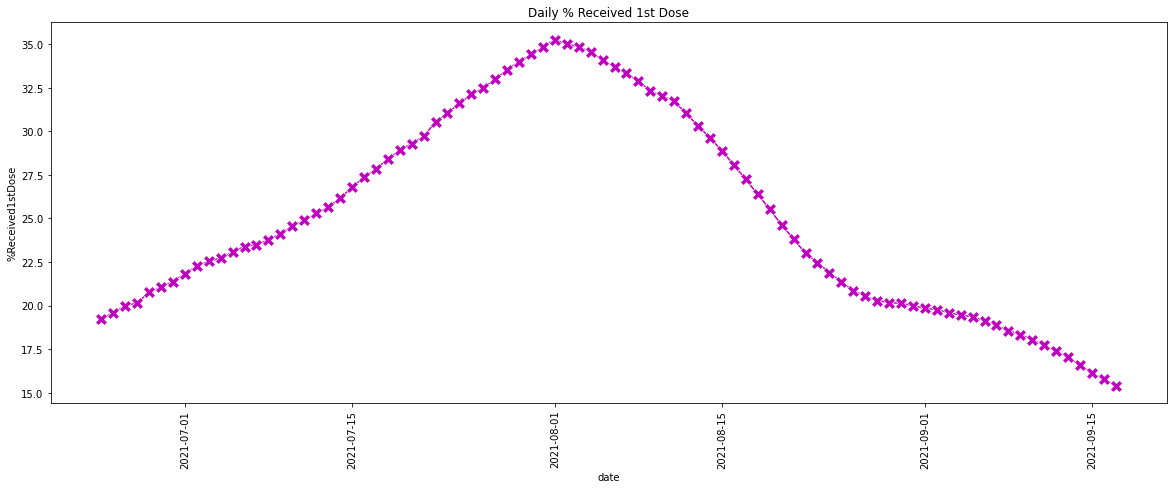

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_msia,x="date",y="%Received1stDose",marker='X',
             markersize =12, color = 'm');

plt.xticks(rotation=90);
plt.title("Daily % Received 1st Dose");

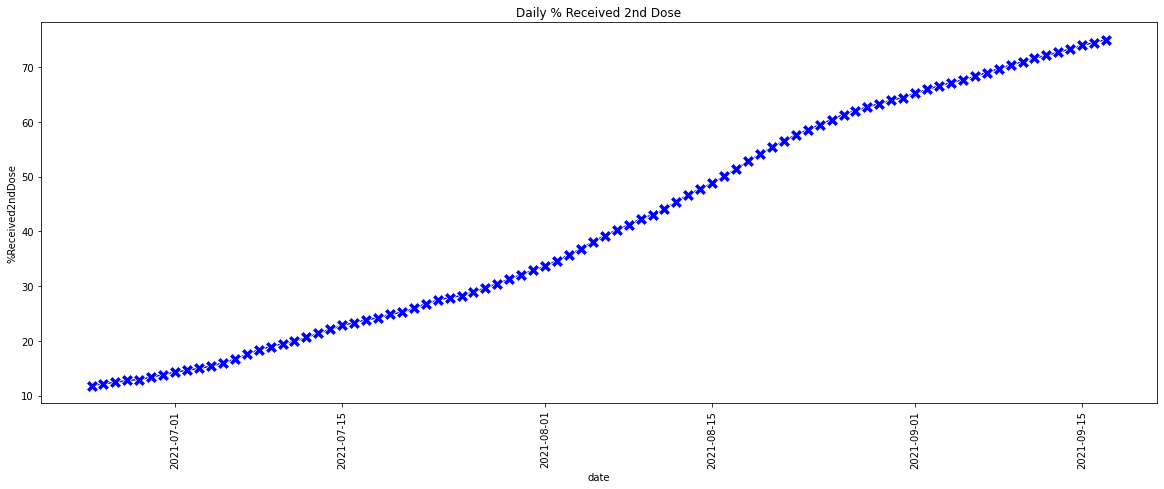

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df_msia,x="date",y="%Received2ndDose",marker='X',
             markersize =12, color = 'b');

plt.xticks(rotation=90);
plt.title("Daily % Received 2nd Dose");

In [ ]:
# Visualize Vaccination Trend by State

fig4 = px.line(df_state, x = 'date', y ='cumul_full', color = 'state')
fig4.update_layout(title={
            'text' : "Daily vaccination 2nd Dose trend by State",
            'y':0.95,
            'x':0.9},
            xaxis_title="Date",
            yaxis_title="Daily 2nd Dose")
fig4.show()

# Visualize Vaccination type - by SUM (not max coz not cumulative)

In [ ]:
# Top States with highest number of total vaccination
top_12=df_state.groupby("state")['pfizer1', 'astra1','sinovac1','cansino'].sum().sort_values(by='pfizer1',ascending= True).head(16).reset_index()

trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["state",'pfizer1', 'astra1','sinovac1','cansino'],
                fill = dict(color = '#2830a1'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_12['state'],top_12['pfizer1'], top_12['astra1'],top_12['sinovac1'],top_12['cansino']],
               fill = dict(color = ['#2830a1', '#7379eb']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))



layout = dict(
    width=1500,
    height=500,
    autosize=False,
    title='Most used VACCINE TYPE for 1st Dose by State',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    # yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig6 = dict(data=[trace], layout=layout)
iplot(fig6)

In [ ]:
top_11=df_state.groupby("state")['pfizer1', 'astra1','sinovac1','cansino'].sum().sort_values(by='sinovac1',ascending= False).head(10).reset_index()

trace = go.Bar(x=top_11['pfizer1'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='pfizer1',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

trace1 = go.Bar(x=top_11['astra1'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='astra1',
                orientation='h',
                marker=dict(color='red', line=dict(color='blue', width=1)),opacity=0.90)

trace2 = go.Bar(x=top_11['sinovac1'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='sinovac1',
                orientation='h',
                marker=dict(color='#44dbcc', line=dict(color='blue', width=1)),opacity=0.90)

trace3 = go.Bar(x=top_11['cansino'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='cansino',
                orientation='h',
                marker=dict(color='green', line=dict(color='blue', width=1)),opacity=0.90)

layout = dict(
    width=1000,
    height=600,
    autosize=False,
    title='Top administered VACCINE TYPE for 1st Dose by State',
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig7 = dict(data=[trace, trace1, trace2, trace3], layout=layout)
iplot(fig7)

In [ ]:
# cols = ['pfizer1', 'pfizer2', 'sinovac1', 'sinovac2', 'astra1', 'astra2','cansino']
pfizer1 = df_msia['pfizer1'].sum()
pfizer2 = df_msia['pfizer2'].sum()
sinovac1 = df_msia['sinovac1'].sum()
sinovac2 = df_msia['sinovac2'].sum()
astra1 = df_msia['astra1'].sum()
astra2 = df_msia['astra2'].sum()
cansino = df_msia['cansino'].sum()

print('pfizer1', pfizer1)
print('pfizer2', pfizer2)
print('sinovac1', sinovac1)
print('sinovac2', sinovac2)
print('astra1', astra1)
print('astra2', astra2)
print('cansino', cansino)

pfizer1 10238444
pfizer2 7987616
sinovac1 9435733
sinovac2 8857267
astra1 2023079
astra2 1157550
cansino 74049


In [ ]:
# Top type of vaccine used in 2nd Dose
top_12=df_state.groupby("state")['pfizer2', 'astra2','sinovac2','cansino'].sum().sort_values(by='astra2',ascending= False).head(16).reset_index()

trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["state",'pfizer2', 'astra2','sinovac2','cansino'],
                fill = dict(color = '#2830a1'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_12['state'],top_12['pfizer2'], top_12['astra2'],top_12['sinovac2'],top_12['cansino']],
               fill = dict(color = ['#2830a1', '#7379eb']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))



layout = dict(
    width=1700,
    height=500,
    autosize=False,
    title='Most used VACCINE TYPE for 2nd Dose by State',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    # yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig8 = dict(data=[trace], layout=layout)
iplot(fig8)

In [ ]:
top_11=df_state.groupby("state")['pfizer2', 'astra2','sinovac2','cansino'].sum().sort_values(by='sinovac2',ascending= True).head(10).reset_index()

trace = go.Bar(x=top_11['pfizer2'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='pfizer2',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

trace1 = go.Bar(x=top_11['astra2'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='astra2',
                orientation='h',
                marker=dict(color='red', line=dict(color='blue', width=1)),opacity=0.90)

trace2 = go.Bar(x=top_11['sinovac2'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='sinovac2',
                orientation='h',
                marker=dict(color='#45f5e6', line=dict(color='blue', width=1)),opacity=0.90)

trace3 = go.Bar(x=top_11['cansino'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='cansino',
                orientation='h',
                marker=dict(color='green', line=dict(color='blue', width=1)),opacity=0.90)

layout = dict(
    width=1000,
    height=600,
    autosize=False,
    title='Most used vaccine for 2nd Dose by State',
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig9 = dict(data=[trace, trace1, trace2, trace3], layout=layout)
iplot(fig9)

# Most used vaccine type

In [ ]:
# cols = ['pfizer1', 'pfizer2', 'sinovac1', 'sinovac2', 'astra1', 'astra2','cansino']
pfizer1 = df_msia['pfizer1'].sum()
pfizer2 = df_msia['pfizer2'].sum()
sinovac1 = df_msia['sinovac1'].sum()
sinovac2 = df_msia['sinovac2'].sum()
astra1 = df_msia['astra1'].sum()
astra2 = df_msia['astra2'].sum()
cansino = df_msia['cansino'].sum()

print('pfizer1', pfizer1)
print('pfizer2', pfizer2)
print('sinovac1', sinovac1)
print('sinovac2', sinovac2)
print('astra1', astra1)
print('astra2', astra2)
print('cansino', cansino)

pfizer1 10238444
pfizer2 7987616
sinovac1 9435733
sinovac2 8857267
astra1 2023079
astra2 1157550
cansino 74049


# Registration EDA

In [ ]:
df_state.columns

Index(['date', 'state', 'daily_partial', 'daily_full', 'daily',
       'cumul_partial', 'cumul_full', 'cumul', 'cumul_partial_child',
       'cumul_full_child', 'pfizer1', 'pfizer2', 'sinovac1', 'sinovac2',
       'astra1', 'astra2', 'cansino', 'pending', 'idxs', 'pop', 'pop_18',
       'pop_60', 'total', 'phase2', 'mysj', 'call', 'web', 'children',
       'elderly', 'comorb', 'oku', 'Received1stDose', 'Unregistered',
       'Waiting_for_1st_dose', '%Received1stDose', '%Received2ndDose',
       '%Waiting_for_1st_dose', '%Unregistered', '%Registered', '%MySej',
       '%call', '%web', '%child', '%comorb', '%elderly', '%oku'],
      dtype='object')

In [ ]:
top_10=df_state.groupby("state")["%Registered"].max().sort_values(ascending= False).head(16).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["state","Total % Registered"],
                fill = dict(color = '#073763'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['state'],top_10['%Registered']],
               fill = dict(color = ['#354487', '#7379eb']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['%Registered'],
                y=top_10['state'],             
                xaxis='x1',
                yaxis='y1',
                orientation='h',
                marker=dict(color='#05f2da'),opacity=0.60)

layout = dict(
    width=1500,
    height=700,
    autosize=False,
    title='Top States by % Registered',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig10 = dict(data=[trace, trace1], layout=layout)
iplot(fig10)

In [ ]:
df_state.tail(3)

,date,state,daily_partial,daily_full,daily,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,idxs,pop,pop_18,pop_60,total,phase2,mysj,call,web,children,elderly,comorb,oku,Received1stDose,Unregistered,Waiting_for_1st_dose,%Received1stDose,%Received2ndDose,%Waiting_for_1st_dose,%Unregistered,%Registered,%MySej,%call,%web,%child,%comorb,%elderly,%oku
3293,2021-09-17,W.P. Kuala Lumpur,1582,17966,19548,2807016,2523627,5330629,283,0,1198,2584,349,4460,0,10848,14,95,14,1773700,1348600,205800,2096390,520000,2058496,1143,36751,136565,257125,370418,49880,283389,-322690,-710626,15.98%%,120.38%%,-33.9%%,-18.19%%,118.19%%,98.19%%,0.05%%,1.75%%,6.51%%,17.67%%,12.27%%,2.38%%
3294,2021-09-17,W.P. Labuan,45,75,120,73837,66984,140821,2461,0,43,70,2,5,0,0,0,0,15,99600,68500,7900,70453,18440,65328,17,5108,6837,6679,14645,1346,6853,29147,-3384,6.88%%,95.08%%,-4.8%%,29.26%%,70.74%%,92.73%%,0.02%%,7.25%%,9.7%%,20.79%%,9.48%%,1.91%%
3295,2021-09-17,W.P. Putrajaya,139,685,824,128688,123078,251766,0,0,139,658,0,22,0,0,0,5,16,110000,67700,5000,101101,24060,99645,37,1419,12523,5184,21148,1970,5610,8899,-27587,5.1%%,121.74%%,-27.29%%,8.09%%,91.91%%,98.56%%,0.04%%,1.4%%,12.39%%,20.92%%,5.13%%,1.95%%


In [ ]:
top_16=df_state.groupby("state")["%Unregistered"].last().sort_values(ascending= True).head(16).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["STATE","Total % Unregistered"],
                fill = dict(color = '#354487'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_16['state'],top_16['%Unregistered']],
               fill = dict(color = ['#354487', '#7379eb']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_16['%Unregistered'],
                y=top_16['state'],             
                xaxis='x1',
                yaxis='y1',
                orientation='h',
                marker=dict(color='#e605f2'),opacity=0.60)

layout = dict(
    width=1500,
    height=700,
    autosize=False,
    title='Top States by % UNREGISTERED',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig11 = dict(data=[trace, trace1], layout=layout)
iplot(fig11)

In [ ]:


top_11=df_state.groupby("state")['%Registered', '%Unregistered'].last().sort_values(by='%Registered',ascending= False).head(16).reset_index()

trace = go.Bar(x=top_11['%Registered'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%Registered',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

trace1 = go.Bar(x=top_11['%Unregistered'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%Unregistered',
                orientation='h',
                marker=dict(color='#e605f2', line=dict(color='#f2059f', width=1)),opacity=0.90)

layout = dict(
    width=1000,
    height=700,
    autosize=False,
    title='Percentage Registered and Unregistered by State',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig12 = dict(data=[trace, trace1], layout=layout)
iplot(fig12)


In [ ]:
#Percentage Registration (MySej / Web / Call) by State

top_12=df_state.groupby("state")['%MySej', '%call','%web'].last().sort_values(by='%MySej',ascending= False).head(16).reset_index()

trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["STATE",'%MySej', '%call','%web'],
                fill = dict(color = '#2830a1'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_12['state'],top_12['%MySej'], top_12['%call'],top_12['%web']],
               fill = dict(color = ['#2830a1', '#7379eb']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))



layout = dict(
    width=1500,
    height=600,
    autosize=False,
    title='Percentage Registration (MySej / Web / Call) by State',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    # yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig13 = dict(data=[trace], layout=layout)
iplot(fig13)

In [ ]:
df_state.tail(3)

,date,state,daily_partial,daily_full,daily,cumul_partial,cumul_full,cumul,cumul_partial_child,cumul_full_child,pfizer1,pfizer2,sinovac1,sinovac2,astra1,astra2,cansino,pending,idxs,pop,pop_18,pop_60,total,phase2,mysj,call,web,children,elderly,comorb,oku,Received1stDose,Unregistered,Waiting_for_1st_dose,%Received1stDose,%Received2ndDose,%Waiting_for_1st_dose,%Unregistered,%Registered,%MySej,%call,%web,%child,%comorb,%elderly,%oku
3293,2021-09-17,W.P. Kuala Lumpur,1582,17966,19548,2807016,2523627,5330629,283,0,1198,2584,349,4460,0,10848,14,95,14,1773700,1348600,205800,2096390,520000,2058496,1143,36751,136565,257125,370418,49880,283389,-322690,-710626,15.98%%,120.38%%,-33.9%%,-18.19%%,118.19%%,98.19%%,0.05%%,1.75%%,6.51%%,17.67%%,12.27%%,2.38%%
3294,2021-09-17,W.P. Labuan,45,75,120,73837,66984,140821,2461,0,43,70,2,5,0,0,0,0,15,99600,68500,7900,70453,18440,65328,17,5108,6837,6679,14645,1346,6853,29147,-3384,6.88%%,95.08%%,-4.8%%,29.26%%,70.74%%,92.73%%,0.02%%,7.25%%,9.7%%,20.79%%,9.48%%,1.91%%
3295,2021-09-17,W.P. Putrajaya,139,685,824,128688,123078,251766,0,0,139,658,0,22,0,0,0,5,16,110000,67700,5000,101101,24060,99645,37,1419,12523,5184,21148,1970,5610,8899,-27587,5.1%%,121.74%%,-27.29%%,8.09%%,91.91%%,98.56%%,0.04%%,1.4%%,12.39%%,20.92%%,5.13%%,1.95%%


In [ ]:
top_11=df_state.groupby("state")['%MySej','%call','%web'].last().sort_values(by='%MySej',ascending= False).head(16).reset_index()

trace = go.Bar(x=top_11['%MySej'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%MySej',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

trace1 = go.Bar(x=top_11['%call'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%call',
                orientation='h',
                marker=dict(color='red', line=dict(color='blue', width=1)),opacity=0.90)

trace2 = go.Bar(x=top_11['%web'],
                y=top_11['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%web',
                orientation='h',
                marker=dict(color='#05f2e6', line=dict(color='red', width=1)),opacity=0.90)

layout = dict(
    width=1000,
    height=600,
    autosize=False,
    title='Type of Registrations by State',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig14 = dict(data=[trace, trace1, trace2], layout=layout)
iplot(fig14)

In [ ]:
top_12=df_state.groupby("state")['%child', '%elderly','%oku','%comorb'].last().sort_values(by='%child',ascending= False).head(16).reset_index()

trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["STATE",'%child', '%elderly','%oku','%comorb'],
                fill = dict(color = '#2830a1'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    
    cells=dict(values=[top_12['state'],top_12['%child'], top_12['%elderly'],top_12['%oku'], top_12['%comorb']],
               fill = dict(color = ['#2830a1', '#7379eb']),
               font = dict(color = 'white', size = 14),
               align = ['center'],height=20))

layout = dict(
    width=1900,
    height=600,
    autosize=False,
    title='Percentage Registration (Children / Elderly / OKU / Comorb) by State',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    # yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig15 = dict(data=[trace], layout=layout)
iplot(fig15)

In [ ]:
top_17=df_state.groupby("state")['%child', '%elderly','%oku','%comorb'].last().sort_values(by='%child',ascending= False).head(16).reset_index()

trace = go.Bar(x=top_17['%child'],
                y=top_17['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%child',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

trace1 = go.Bar(x=top_17['%elderly'],
                y=top_17['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%elderly',
                orientation='h',
                marker=dict(color='#d955e6', line=dict(color='#7c1c99', width=1)),opacity=0.90)

trace2 = go.Bar(x=top_17['%oku'],
                y=top_17['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%oku',
                orientation='h',
                marker=dict(color='#e86827', line=dict(color='red', width=1)),opacity=0.90)

trace3 = go.Bar(x=top_17['%comorb'],
                y=top_17['state'],             
                xaxis='x1',
                yaxis='y1',
                name='%comorb',
                orientation='h',
                marker=dict(color='#1ea888', line=dict(color='#1a8f50', width=1)),opacity=0.90)

layout = dict(
    width=1000,
    height=800,
    autosize=False,
    title='Type of Registrations by State',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.1f', color = '#2830a1')),  
)

fig16 = dict(data=[trace, trace1, trace2, trace3], layout=layout)
iplot(fig16)

In [ ]:
df_state.columns

Index(['date', 'state', 'daily_partial', 'daily_full', 'daily',
       'cumul_partial', 'cumul_full', 'cumul', 'cumul_partial_child',
       'cumul_full_child', 'pfizer1', 'pfizer2', 'sinovac1', 'sinovac2',
       'astra1', 'astra2', 'cansino', 'pending', 'idxs', 'pop', 'pop_18',
       'pop_60', 'total', 'phase2', 'mysj', 'call', 'web', 'children',
       'elderly', 'comorb', 'oku', 'Received1stDose', 'Unregistered',
       'Waiting_for_1st_dose', '%Received1stDose', '%Received2ndDose',
       '%Waiting_for_1st_dose', '%Unregistered', '%Registered', '%MySej',
       '%call', '%web', '%child', '%comorb', '%elderly', '%oku'],
      dtype='object')

In [ ]:
# If we compare total registered with total population for elderly people


top_18=df_state.groupby("state")['pop_60', 'elderly'].last().sort_values(by='elderly',ascending= True).head(16).reset_index()

trace = go.Bar(x=top_18['elderly'],
                y=top_18['state'],             
                xaxis='x1',
                yaxis='y1',
                name='elderly',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

trace1 = go.Bar(x=top_18['pop_60'],
                y=top_18['state'],             
                xaxis='x1',
                yaxis='y1',
                name='pop_60',
                orientation='h',
                marker=dict(color='#d955e6', line=dict(color='#7c1c99', width=1)),opacity=0.90)

layout = dict(
    width=1000,
    height=800,
    autosize=False,
    title='Comparison between elderly population vs elderly registered',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.1f', color = '#2830a1')),  
)

fig17 = dict(data=[trace, trace1, trace2, trace3], layout=layout)
iplot(fig17)

In [ ]:
# If we compare total registered with total population for elderly people


top_19=df_state.groupby("state")['pop_18', 'children'].last().sort_values(by='children',ascending= True).head(16).reset_index()

trace = go.Bar(x=top_19['children'],
                y=top_19['state'],             
                xaxis='x1',
                yaxis='y1',
                name='children',
                orientation='h',
                marker=dict(color='blue'),opacity=0.60)

trace1 = go.Bar(x=top_19['pop_18'],
                y=top_19['state'],             
                xaxis='x1',
                yaxis='y1',
                name='pop_18',
                orientation='h',
                marker=dict(color='#d955e6', line=dict(color='#7c1c99', width=1)),opacity=0.90)

layout = dict(
    width=1000,
    height=800,
    autosize=False,
    title='Comparison between children population vs children registered',font = dict(color = '#2830a1', size = 14),
    showlegend=False,   
    # xaxis1=dict(**dict(domain=[0.68, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.1f', color = '#2830a1')),  
)

fig18 = dict(data=[trace, trace1, trace2, trace3], layout=layout)
iplot(fig18)

In [ ]:
!pip install chart-studio